<a href="https://colab.research.google.com/github/YinterestingProjects/human-wildlife-interactions/blob/main/notebooks/BERTopics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [38]:
! pip install pandas==1.4.2 bertopic==0.14.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import pickle
import pandas as pd
from bertopic import BERTopic

RANDOM_SEED = 42

In [5]:
# directory setup
user = "sally"
#user = "jina"
#user = "josh"
     
try:
  if user == "sally":
    directory = '/content/drive/MyDrive/MADS/MADS_Capstone'
  elif user == "jina":
    directory = "JINA: INSERT YOUR PATH HERE"
  elif user == "josh":
    directory = "/content/drive/MyDrive/MADS_Capstone"
except:
  dprint("No user has been selected")


In [6]:
def filter_null(df, verbose=True):
    '''filter null translations'''
    clean_corp = df[(df != ' ') & (df != '') & (df != 'source language unavailable for translation')]  
    if verbose:
        print(f'{len(df) - len(clean_corp)} null records dropped out of {len(df)}')  
    return clean_corp

In [44]:
fp = f'{directory}/data/processed/desc_title_translated.pkl'
corpus = pd.read_pickle(fp)
  
order = corpus.index
new_doc = docs.reset_index()
docs = filter_null(new_doc['title_en'])
  

train = False
model_fp = f'{directory}/models/bertopic'

if train: 
  topic_model = BERTopic()
  topics, probs = topic_model.fit_transform(docs)
  topic_model.save(model_fp)
else:
  topic_model = BERTopic.load(model_fp)

0 null records dropped out of 3869


In [18]:
topic_model.get_topic_info()

,Topic,Count,Name
0,-1,1157,-1_the_and_park_of
1,0,195,0_deer_archery_bow_buck
2,1,189,1_zoo_asahiyama_aquarium_singapore
3,2,181,2_de_rica_el_costa
4,3,119,3_tiger_tigers_white_bengal
...,...,...,...
71,70,11,70_hyena_whisperer_hyenas_laughing
72,71,11,71_coyote_mile_downwind_jump
73,72,11,72_management_wildlife_invasion_tilling
74,73,10,73_bryce_zion_parks_canyon


In [17]:
topic_model.visualize_topics()

In [28]:
topic_model.visualize_barchart(top_n_topics=40, n_words=10)

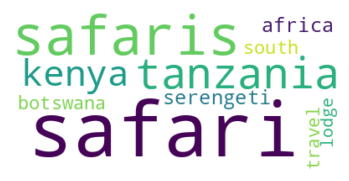

In [24]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def create_wordcloud(model, topic):
    text = {word: value for word, value in model.get_topic(topic)}
    wc = WordCloud(background_color="white", max_words=1000)
    wc.generate_from_frequencies(text)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()

# Show wordcloud
create_wordcloud(topic_model, topic=6)

In [43]:
topic_model.visualize_heatmap()

In [45]:
hierarchical_topics = topic_model.hierarchical_topics(docs)
topic_model.visualize_hierarchy(hierarchical_topics=hierarchical_topics)

100%|██████████| 74/74 [00:01<00:00, 46.27it/s]
